# Session 7: Error convergence of numerical methods

Date: 10/30/2017, Monday

In [1]:
format compact

## Error convergence of general numerical methods

Many numerical methods has a "step size" or "interval size" $h$, no mattter numerical differentiation, numerical intergration or ODE solving. We denote $f(h)$ as the numerical approximation to the exact answer $f_{true}$. Note that $f$ can be a derivate, an integral or an ODE solution.

In general, the numerical error gets smaller when $h$ is reduced. We say a method has $O(h^k)$ convergence if
$$
f(h) - f_{true} = C \cdot h^k + C_1 \cdot h^{k+1} + ...
$$

As $h \rightarrow 0$, we will have $f(h) \rightarrow f_{true}$. Higher-order methods (i.e. larger $k$) leads to faster convergence.

## Error convergence of numerical differentiation

Consider $f(x) = e^x$, we use finite difference to approximate $g(x)=f'(x)=e^x$. We only consider $x=1$ here.

In [2]:
f = @(x) exp(x); % the function we want to differentiate

In [3]:
x0 = 1; % only consider this point
g_true = exp(x0) % analytical solution

g_true =
    2.7183


We try both forward and center schemes, with different step sizes $h$.

In [4]:
h_list = 0.01:0.01:0.1; % test different step size h
n = length(h_list);
g_forward = zeros(1,n); % to hold forward difference results
g_center = zeros(1,n); % to hold center difference results

for i = 1:n % loop over different step sizes
    h = h_list(i); % get step size 
    
    % forward difference
    g_forward(i) = (f(x0+h) - f(x0))/h;  
    
    % center difference
    g_center(i) = (f(x0+h) - f(x0-h))/(2*h);  
end

The first element in `g_forward` is quite accurate, but the error grows as the step size $h$ gets larger.

In [5]:
g_forward

g_forward =
  Columns 1 through 7
    2.7319    2.7456    2.7595    2.7734    2.7874    2.8015    2.8157
  Columns 8 through 10
    2.8300    2.8444    2.8588


Center difference scheme is much more accurate.

In [6]:
g_center

g_center =
  Columns 1 through 7
    2.7183    2.7185    2.7187    2.7190    2.7194    2.7199    2.7205
  Columns 8 through 10
    2.7212    2.7220    2.7228


Compute the absolute error of each scheme

In [7]:
error_forward = abs(g_forward - g_true)
error_center = abs(g_center - g_true)

error_forward =
  Columns 1 through 7
    0.0136    0.0274    0.0412    0.0551    0.0691    0.0832    0.0974
  Columns 8 through 10
    0.1117    0.1261    0.1406
error_center =
  Columns 1 through 7
    0.0000    0.0002    0.0004    0.0007    0.0011    0.0016    0.0022
  Columns 8 through 10
    0.0029    0.0037    0.0045


Make a $h \leftrightarrow error$ plot.

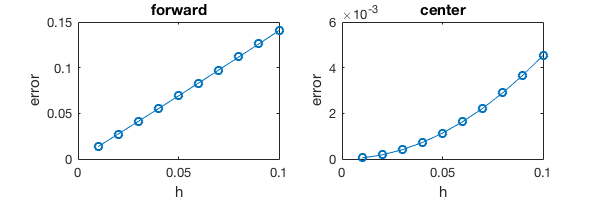

In [8]:
%plot -s 600,200
subplot(121); plot(h_list, error_forward,'-o')
title('forward');xlabel('h');ylabel('error')
subplot(122); plot(h_list, error_center,'-o')
title('center');xlabel('h');ylabel('error')

- Forward scheme gives a straight line because it is a first-order method and $error(h) \approx C \cdot h$

- Center scheme gives a parabola because it is a second-order method and $error(h) \approx C \cdot h^2$

## Diagnosing the order of convergence

But by only looking at the $error(h)$ plot, how can you know the curve is a parabola? Can't it be a cubic $C \cdot h^3$?

Recall that in HW4 you were fitting a function $R = bW^a$. To figure out the coefficients $a$ and $b$, you need to take the log. The same thing here. 

If $error = C \cdot h^k$, then

$$
\log(error) = \log C + k \log h
$$

The slope of the $log(error) \leftrightarrow log(h)$ plot is $k$, i.e. the order of the numerical method. 

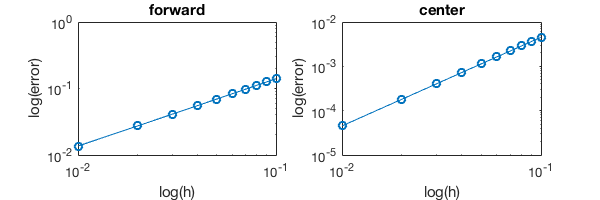

In [9]:
%plot -s 600,200
subplot(121); loglog(h_list, error_forward,'-o')
title('forward');xlabel('log(h)');ylabel('log(error)')
subplot(122); loglog(h_list, error_center,'-o')
title('center');xlabel('log(h)');ylabel('log(error)')

To figure out the slope we can do linear regression. You can solve a least square problem as in HW4&5, but here we use a shortcut as described in [this example](https://www.mathworks.com/help/matlab/data_analysis/linear-regression.html#bswj6xx). `polyfit(x, y, 1)` returns the slope and intercept.

In [10]:
polyfit(log(h_list), log(error_forward), 1)


ans =
    1.0132    0.3662


In [11]:
polyfit(log(h_list), log(error_center), 1)

ans =
    2.0002   -0.7909


The slopes are 1 and 2, respectively. So we've verified that forward-diff is 1st-order accurate while center-diff is 2nd-order accurate.

**If the analytical solution is not known, you can use the most accurate solution (with the smallest h) as the true solution to figure out the slope.** If your numerical scheme is converging to the true solution, then the estimate of order will still be OK. The risk is your numerical scheme might be converging to a wrong solution, and in this case it makes no sense to talk about error convergence.

## $h$ needs to be small

$error(h) \approx C \cdot h^k$ only holds for small $h$. When $h$ is sufficiently small, we say that it is in the [asymptotic regime](https://en.wikipedia.org/wiki/Asymptotic_analysis). All the error analysis only holds in the asymptotic regime, and makes little sense when $h$ is very large.

Let's make the step size 100 times larger and see what happens.

In [12]:
h_list = 1:1:10; % h is 100x larger than before

% -- the codes below are exactly the same as before --

n = length(h_list);
g_forward = zeros(1,n); % to hold forward difference results
g_center = zeros(1,n); % to hold center difference results

for i = 1:n % loop over different step sizes
    h = h_list(i); % get step size 
    
    % forward difference
    g_forward(i) = (f(x0+h) - f(x0))/h;  
    
    % center difference
    g_center(i) = (f(x0+h) - f(x0-h))/(2*h);  
end

error_forward = abs(g_forward - g_true);
error_center = abs(g_center - g_true);

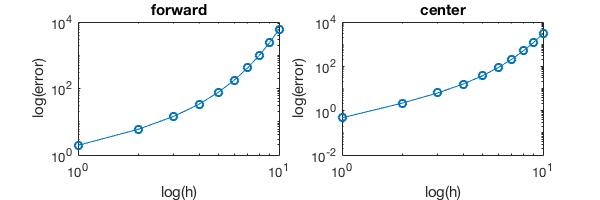

In [13]:
%plot -s 600,200
subplot(121); loglog(h_list, error_forward,'-o')
title('forward');xlabel('log(h)');ylabel('log(error)')
subplot(122); loglog(h_list, error_center,'-o')
title('center');xlabel('log(h)');ylabel('log(error)')

Now the error is super large and the log-log plot is not a straight line. So keep in mind that for most numerical schemes we always assume small $h$.

So how small is "small"? It depends on the scale of your problem and how rapidly $f(x)$ changes. If the problem is defined in $x \in [0,0.001]$, then $h=0.001$ is not small at all!

## Error convergence of numerical intergration

Now consider 
$$
I = \int_0^1 f(x)
$$

We still use $f(x) = e^x$ for convenience, as the integral of $e^x$ is still $e^x$.

In [14]:
f = @(x) exp(x); % the function we want to integrate

In [15]:
I_true = exp(1)-exp(0)

I_true =
    1.7183


We use composite midpoint scheme to approximate $I$. We test different interval size $h$. Note that we need to first define the number of intervals $m$, and then get the corresponding $h$, because $m$ has to be an integer.

In [16]:
m_list = 10:10:100; % number of points
h_list = 1./m_list; % interval size

n = length(m_list);
I_list = zeros(1,n); % to hold intergration results

for i=1:n % loop over different interval sizes (or number of intevals)
    m = m_list(i);
    h = h_list(i);
    
    % get edge points
    x_edge = linspace(0, 1, m+1); 
    
    % edge to middle
    x_mid = (x_edge(1:end-1) + x_edge(2:end))/2;
    
    % composite midpoint intergration scheme
    I_list(i) = h*sum(f(x_mid));
end

The result is quite accurate.

In [17]:
I_list

I_list =
  Columns 1 through 7
    1.7176    1.7181    1.7182    1.7182    1.7183    1.7183    1.7183
  Columns 8 through 10
    1.7183    1.7183    1.7183


The error is at the order of $10^{-3}$.

In [18]:
error_I = abs(I_list-I_true)

error_I =
   1.0e-03 *
  Columns 1 through 7
    0.7157    0.1790    0.0795    0.0447    0.0286    0.0199    0.0146
  Columns 8 through 10
    0.0112    0.0088    0.0072


Again, a log-log plot will provide more insights about the order of convergence.

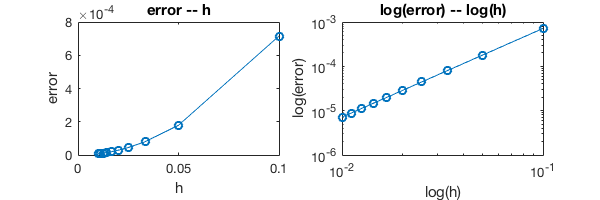

In [19]:
%plot -s 600,200
subplot(121);plot(h_list, error_I, '-o')
title('error -- h');xlabel('h');ylabel('error')
subplot(122);loglog(h_list, error_I, '-o')
title('log(error) -- log(h)');xlabel('log(h)');ylabel('log(error)')

The slope is 2, so the method is second order accurate. 

In [20]:
polyfit(log(h_list), log(error_I), 1)

ans =
    1.9999   -2.6372


**We've just applied the same error analysis method on both differentiation and integration. The same method also applies to ODE solving.**

## Error convergence of ODE solving

Consider a simple ODE

$$
\frac{dy(t)}{dt} = y(t),\ \ y(0)=1
$$

The exact solution is $y(t) = e^t$. We use the forward Euler scheme to solve it.

$$
\frac{y(t+h) - y(t)}{h} \approx y(t)
$$

The iteration is given by
$$
y(t+h) = y(t) + h \cdot y(t) = (1+h)y(t) 
$$

Let's only consider $t \in [0,1]$. More specifically, we'll only look at the final state $y(1)$, so we don't need to record every step.

In [21]:
y1_true = exp(1) % true y(1)

y1_true =
    2.7183


Same as in the integration section, we need to first define the number of total iterations $m$, and then get the corresponding step size $h$. This ensures we will land exactly at $t=1$, not its neighbours.

In [22]:
y0 = 1; % initial condition

m_list = 10:10:100; % number of iterations to get to t=1
h_list = 1./m_list; % step size

n = length(m_list);
y1_list = zeros(1,n); % to hold the final point 

for i=1:n % loop over different step sizes
    m = m_list(i); % get the number of iterations
    h = h_list(i); % get step size
    
    y1 = y0; % start with y(0)
    
    % Euler scheme begins here
    for t=1:m
        y1 = (1+h)*y1; % no need to record intermediate results here
    end
    
    y1_list(i) = y1; % only record the final point
    
end

As $h$ shrinks, our simulated $y(1)$ gets closer to the true result.

In [23]:
y1_list

y1_list =
  Columns 1 through 7
    2.5937    2.6533    2.6743    2.6851    2.6916    2.6960    2.6991
  Columns 8 through 10
    2.7015    2.7033    2.7048


In [24]:
error_y1 = abs(y1_list-y1_true)

error_y1 =
  Columns 1 through 7
    0.1245    0.0650    0.0440    0.0332    0.0267    0.0223    0.0192
  Columns 8 through 10
    0.0168    0.0149    0.0135


$error \leftrightarrow h$ plot is a straight line, so we know the method is fist order accurate. The log-log plot is not quite necessary here.

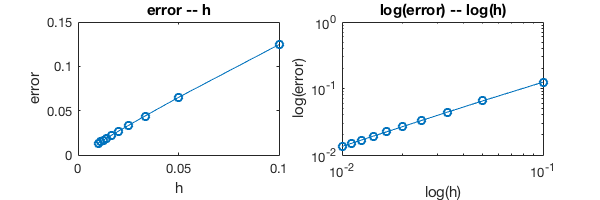

In [25]:
%plot -s 600,200
subplot(121);plot(h_list, error_y1, '-o')
title('error -- h');xlabel('h');ylabel('error')
subplot(122);loglog(h_list, error_y1, '-o')
title('log(error) -- log(h)');xlabel('log(h)');ylabel('log(error)')

Of course we can still calculate the slope of the log-log plot, to double check the forward Euler scheme is a first-order method.

In [26]:
polyfit(log(h_list), log(error_y1), 1)

ans =
    0.9687    0.1613


**The take-away is, you can think about the order of a method in a more general sense. We've covered numerical differentiation, intergration and ODE here, and similar analysis also applies to root-finding, PDE, optimization, etc...**